In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\featue_engg_data.csv")
df

,UTC_Time,Date,Region,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,...,Season_Summer,Season_Winter,Demand_lag1,Demand_lag24,Demand_lag168,Rolling_Mean_3H,Rolling_Mean_24H,Total_Gen,Renewable_Pct,Fossil_Pct
0,2018-07-08 08:00:00,2018-07-08,CAL,1,30664.0,18659.0,-9218.0,29726.0,6.0,10566.0,...,1,0,33215.0,32597.0,26061.0,33371.000,34950.375,15326.0,16.188,68.981
1,2018-07-08 09:00:00,2018-07-08,CAL,2,28781.0,18056.0,-8915.0,27697.0,7.0,10191.0,...,1,0,30664.0,30415.0,24604.0,30886.667,34882.292,14780.0,15.629,68.999
2,2018-07-08 10:00:00,2018-07-08,CAL,3,27512.0,17258.0,-8298.0,26245.0,7.0,9494.0,...,1,0,28781.0,28749.0,23554.0,28985.667,34830.750,13753.0,14.397,69.083
3,2018-07-08 11:00:00,2018-07-08,CAL,4,26610.0,17143.0,-7994.0,25349.0,8.0,9264.0,...,1,0,27512.0,27605.0,22843.0,27634.333,34789.292,13580.0,14.971,68.277
4,2018-07-08 12:00:00,2018-07-08,CAL,5,25947.0,16779.0,-7648.0,24872.0,10.0,9272.0,...,1,0,26610.0,27026.0,22538.0,26689.667,34744.333,13729.0,15.813,67.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525292,2023-07-01 01:00:00,2023-06-30,TEX,20,73862.0,73920.0,58.0,75075.0,11013.0,36589.0,...,1,0,76384.0,77220.0,70515.0,75998.333,65194.000,54596.0,4.308,87.190
525293,2023-07-01 02:00:00,2023-06-30,TEX,21,70570.0,70337.0,-232.0,71706.0,10632.0,36722.0,...,1,0,73862.0,73984.0,67340.0,73605.333,65051.750,52394.0,0.758,90.381
525294,2023-07-01 03:00:00,2023-06-30,TEX,22,67978.0,67953.0,-25.0,69197.0,10592.0,35912.0,...,1,0,70570.0,71456.0,65072.0,70803.333,64906.833,51223.0,0.148,90.787
525295,2023-07-01 04:00:00,2023-06-30,TEX,23,64727.0,64768.0,42.0,65551.0,10055.0,32700.0,...,1,0,67978.0,67461.0,61758.0,67758.333,64792.917,47410.0,0.021,90.181


In [3]:
df.columns.to_list()

['UTC_Time',
 'Date',
 'Region',
 'Hour',
 'Demand',
 'Net_Generation',
 'Total_Interchange',
 'Forecasted_Demand',
 'Coal_Gen',
 'Gas_Gen',
 'Nuclear_Gen',
 'Hydro_Gen',
 'Solar_Gen',
 'CO2_Factor_Coal',
 'CO2_Factor_Gas',
 'CO2_Emissions_Coal',
 'CO2_Emissions_Gas',
 'CO2_Total_Emissions',
 'CO2_Intensity_Generated',
 'CO2_Intensity_Consumed',
 'Year',
 'Month',
 'Day',
 'DayOfWeek',
 'Is_Weekend',
 'Season_Autumn',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Demand_lag1',
 'Demand_lag24',
 'Demand_lag168',
 'Rolling_Mean_3H',
 'Rolling_Mean_24H',
 'Total_Gen',
 'Renewable_Pct',
 'Fossil_Pct']

In [4]:
df = pd.read_csv(r"C:\Users\rosem\Downloads\FINAL_PROJECT_WORKS\CSV_files\featue_engg_data.csv")
df1 = df.copy()

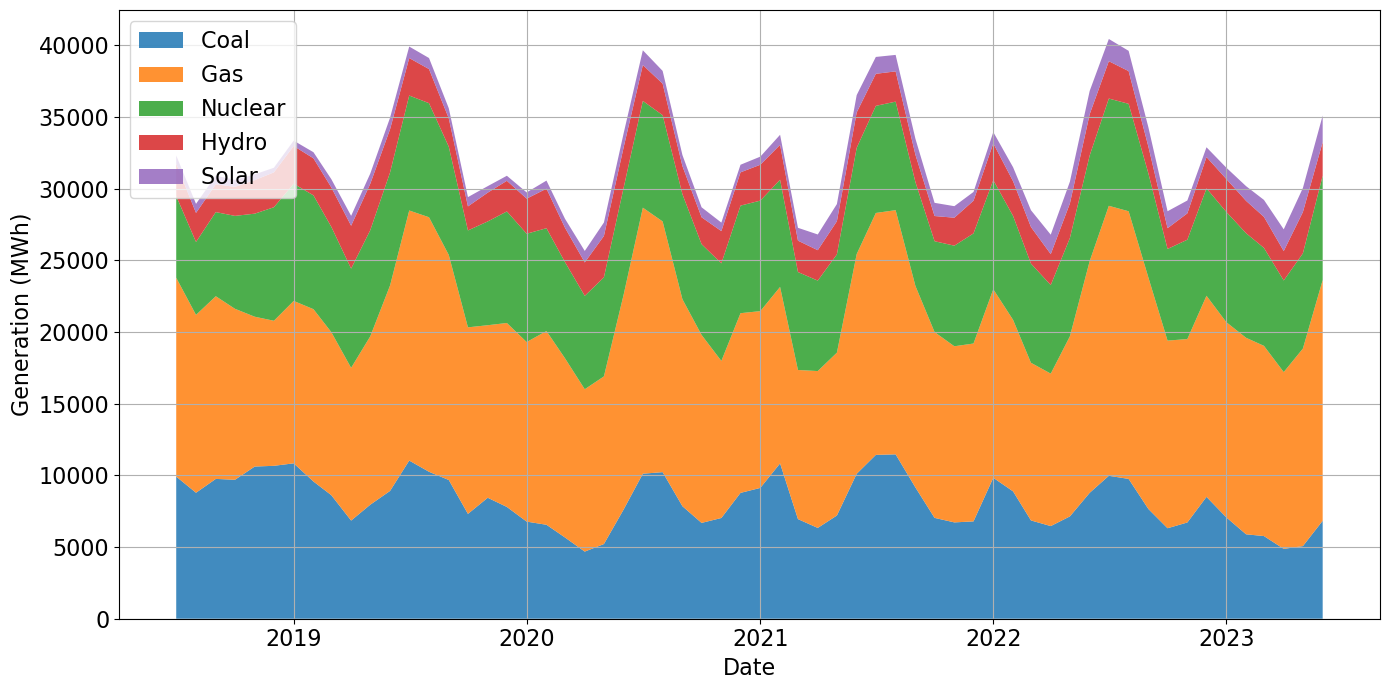

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date column is datetime and sorted
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1.sort_values('Date', inplace=True)
df1.set_index('Date', inplace=True)

# ==========Monthly Stacked Area Chart ==========
df1['Month'] = df1.index.to_period('M')
monthly_mix = df1.groupby('Month')[['Coal_Gen', 'Gas_Gen', 'Nuclear_Gen', 'Hydro_Gen', 'Solar_Gen']].mean()
monthly_mix.index = monthly_mix.index.to_timestamp()

plt.figure(figsize=(14, 7))
plt.stackplot(monthly_mix.index,
              monthly_mix['Coal_Gen'],
              monthly_mix['Gas_Gen'],
              monthly_mix['Nuclear_Gen'],
              monthly_mix['Hydro_Gen'],
              monthly_mix['Solar_Gen'],
              labels=['Coal ', 'Gas ', 'Nuclear', 'Hydro ', 'Solar '],
              alpha=0.85)
#plt.title("Monthly Average Energy Generation by Source", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Generation (MWh)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', fontsize=16)  # <- Updated legend font size
plt.grid(True)
plt.tight_layout()
plt.show()



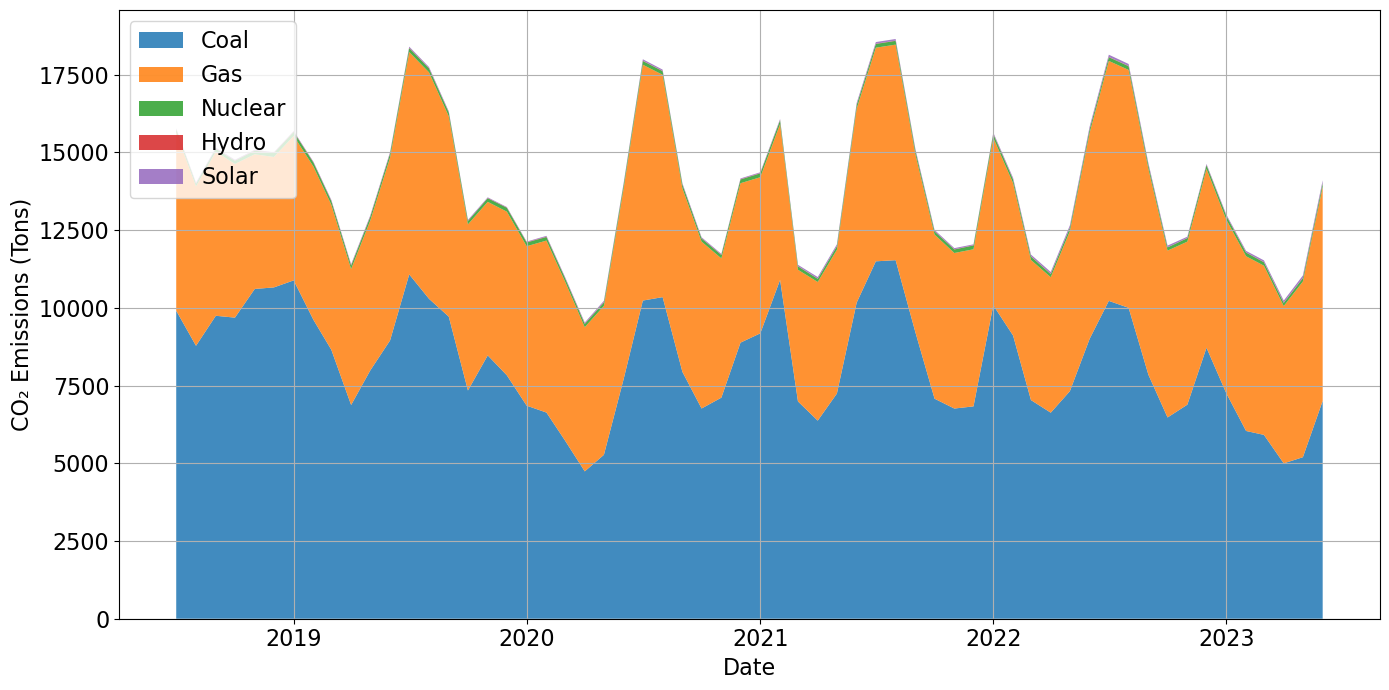

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is datetime and set as index (only do this once)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# 1. Estimate emissions for sources not in the dataset
df['CO2_Emissions_Nuclear'] = df['Nuclear_Gen'] * 16 / 1000  # kg to tons
df['CO2_Emissions_Hydro'] = df['Hydro_Gen'] * 4 / 1000
df['CO2_Emissions_Solar'] = df['Solar_Gen'] * 45 / 1000

# 2. Group by Month and calculate average emissions
df['Month'] = df.index.to_period('M')  # ✅ Now valid because index is datetime
monthly_co2 = df.groupby('Month')[[
    'CO2_Emissions_Coal',
    'CO2_Emissions_Gas',
    'CO2_Emissions_Nuclear',
    'CO2_Emissions_Hydro',
    'CO2_Emissions_Solar'
]].mean()
monthly_co2.index = monthly_co2.index.to_timestamp()  # Convert PeriodIndex back to timestamp

# 3. Plot stacked area chart
plt.figure(figsize=(14, 7))
plt.stackplot(monthly_co2.index,
              monthly_co2['CO2_Emissions_Coal'],
              monthly_co2['CO2_Emissions_Gas'],
              monthly_co2['CO2_Emissions_Nuclear'],
              monthly_co2['CO2_Emissions_Hydro'],
              monthly_co2['CO2_Emissions_Solar'],
              labels=['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar'],
              alpha=0.85)
plt.xlabel("Date", fontsize=16)
plt.ylabel("CO₂ Emissions (Tons)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
df = pd.read_csv(r"C:\Users\featue_engg_data.csv")
df

,UTC_Time,Date,Region,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,...,Season_Summer,Season_Winter,Demand_lag1,Demand_lag24,Demand_lag168,Rolling_Mean_3H,Rolling_Mean_24H,Total_Gen,Renewable_Pct,Fossil_Pct
0,2018-07-08 08:00:00,2018-07-08,CAL,1,30664.0,18659.0,-9218.0,29726.0,6.0,10566.0,...,1,0,33215.0,32597.0,26061.0,33371.000,34950.375,15326.0,16.188,68.981
1,2018-07-08 09:00:00,2018-07-08,CAL,2,28781.0,18056.0,-8915.0,27697.0,7.0,10191.0,...,1,0,30664.0,30415.0,24604.0,30886.667,34882.292,14780.0,15.629,68.999
2,2018-07-08 10:00:00,2018-07-08,CAL,3,27512.0,17258.0,-8298.0,26245.0,7.0,9494.0,...,1,0,28781.0,28749.0,23554.0,28985.667,34830.750,13753.0,14.397,69.083
3,2018-07-08 11:00:00,2018-07-08,CAL,4,26610.0,17143.0,-7994.0,25349.0,8.0,9264.0,...,1,0,27512.0,27605.0,22843.0,27634.333,34789.292,13580.0,14.971,68.277
4,2018-07-08 12:00:00,2018-07-08,CAL,5,25947.0,16779.0,-7648.0,24872.0,10.0,9272.0,...,1,0,26610.0,27026.0,22538.0,26689.667,34744.333,13729.0,15.813,67.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525292,2023-07-01 01:00:00,2023-06-30,TEX,20,73862.0,73920.0,58.0,75075.0,11013.0,36589.0,...,1,0,76384.0,77220.0,70515.0,75998.333,65194.000,54596.0,4.308,87.190
525293,2023-07-01 02:00:00,2023-06-30,TEX,21,70570.0,70337.0,-232.0,71706.0,10632.0,36722.0,...,1,0,73862.0,73984.0,67340.0,73605.333,65051.750,52394.0,0.758,90.381
525294,2023-07-01 03:00:00,2023-06-30,TEX,22,67978.0,67953.0,-25.0,69197.0,10592.0,35912.0,...,1,0,70570.0,71456.0,65072.0,70803.333,64906.833,51223.0,0.148,90.787
525295,2023-07-01 04:00:00,2023-06-30,TEX,23,64727.0,64768.0,42.0,65551.0,10055.0,32700.0,...,1,0,67978.0,67461.0,61758.0,67758.333,64792.917,47410.0,0.021,90.181


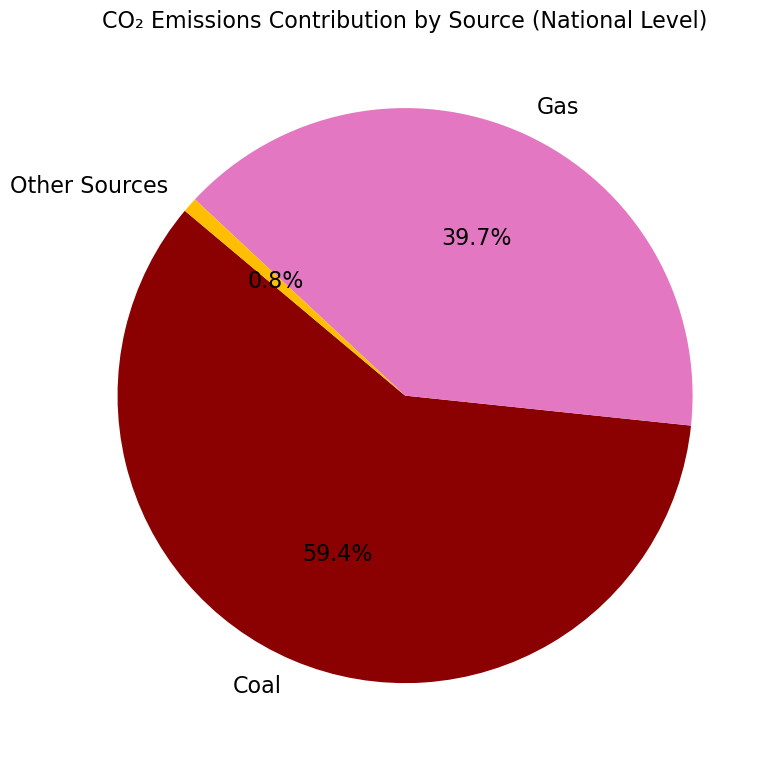

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate total emissions from Coal and Gas for the entire dataset
total_emissions = {
    'Coal': df['CO2_Emissions_Coal'].sum(),
    'Gas': df['CO2_Emissions_Gas'].sum(),
    'Other Sources': df['CO2_Total_Emissions'].sum() - (df['CO2_Emissions_Coal'].sum() + df['CO2_Emissions_Gas'].sum())
}

# 🎨 Custom color palette
custom_colors = ['#8B0000', '#e377c2', '#ffbf00']  # Dark Red, Pink, Yellow

# Plotting as a Pie Chart with custom colors and font sizes
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    total_emissions.values(),
    labels=total_emissions.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors,
    textprops={'fontsize': 16}  # Font size for percentage values
)

# Set label font size (manually if needed)
for text in texts:
    text.set_fontsize(16)

plt.title('CO₂ Emissions Contribution by Source (National Level)', fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
# Map numeric DayOfWeek to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Replace numeric DayOfWeek with day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_map)

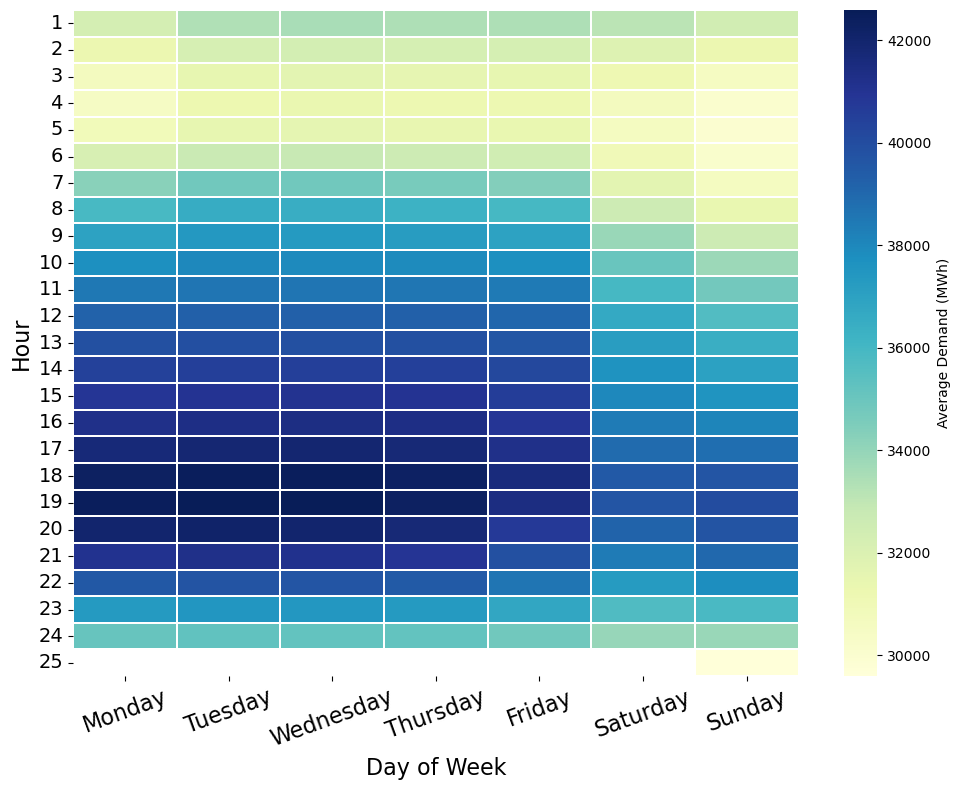

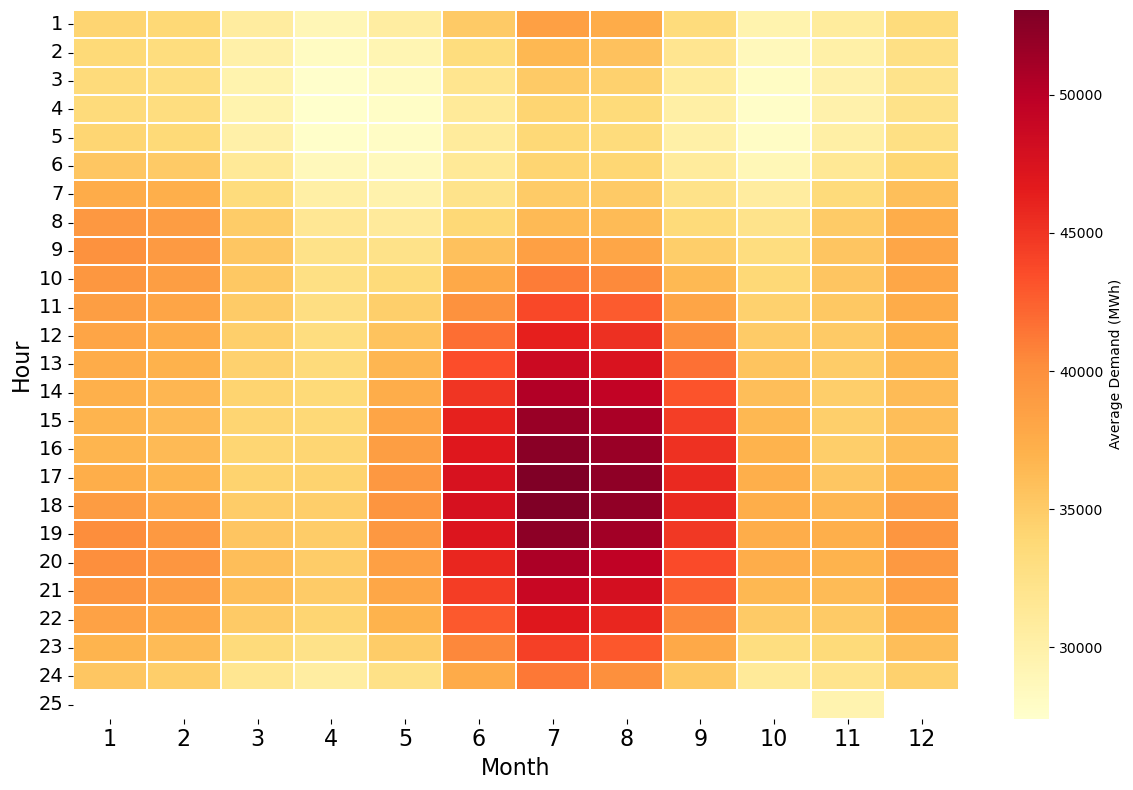

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- Heatmap: Hour vs Day of Week -----------------
heatmap1 = df.pivot_table(index='Hour', columns='DayOfWeek', values='Demand', aggfunc='mean')
heatmap1 = heatmap1[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap1, cmap='YlGnBu', linewidths=0.3, cbar_kws={'label': 'Average Demand (MWh)'})
#plt.title("Average Electricity Demand: Hour vs Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=16)
plt.ylabel("Hour", fontsize=16)
plt.xticks(fontsize=16, rotation=20)   # 👈 Rotate x-axis tick labels
plt.yticks(fontsize=14, rotation=0)    # 👈 Optionally rotate y-axis labels if needed
plt.tight_layout()
plt.show()

# ----------------- Heatmap: Hour vs Month -----------------
heatmap2 = df.pivot_table(index='Hour', columns='Month', values='Demand', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap2, cmap='YlOrRd', linewidths=0.3, cbar_kws={'label': 'Average Demand (MWh)'})
#plt.title("Average Electricity Demand: Hour vs Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Hour", fontsize=16)
plt.xticks(fontsize=16, rotation=0)   # 👈 Rotate x-axis tick labels
plt.yticks(fontsize=14, rotation=0)    # 👈 Optionally rotate y-axis labels if needed
plt.tight_layout()
plt.show()

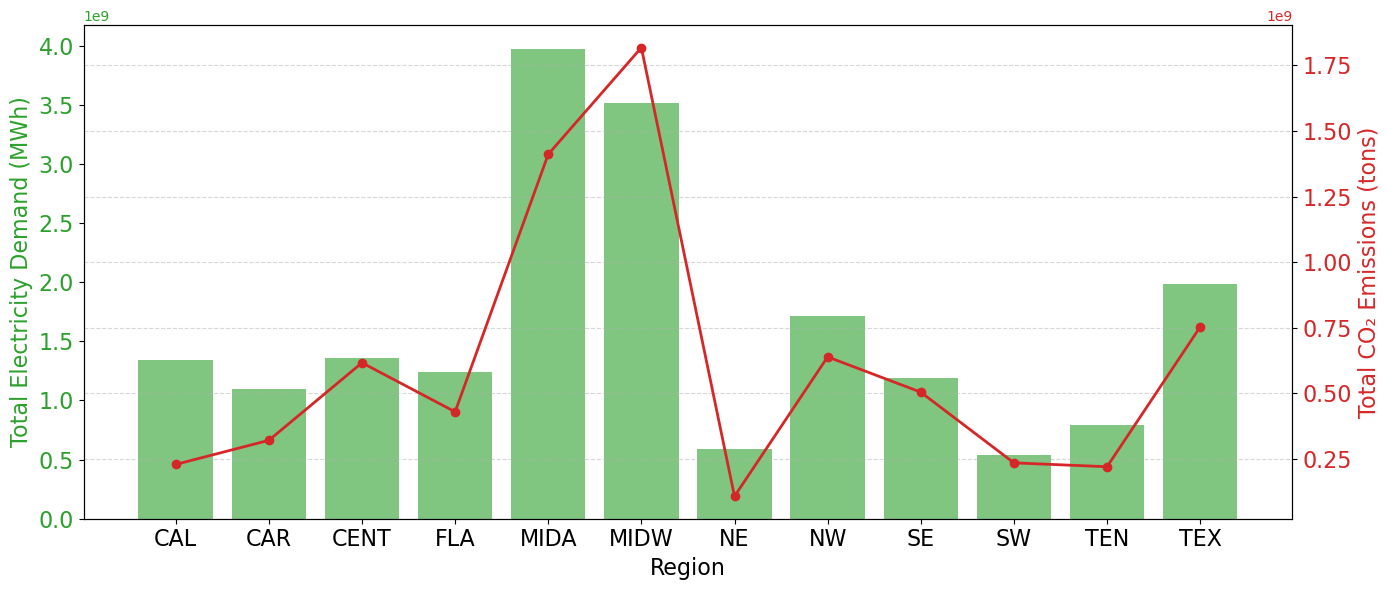

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Region
region_grouped = df.groupby('Region').agg({
    'Demand': 'sum',
    'CO2_Total_Emissions': 'sum'
}).reset_index()

# Plotting with twin axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left y-axis: Electricity Demand
color_demand = 'tab:green'
ax1.set_xlabel('Region', fontsize=16)
ax1.set_ylabel('Total Electricity Demand (MWh)', color=color_demand, fontsize=16)
ax1.bar(region_grouped['Region'], region_grouped['Demand'], color=color_demand, alpha=0.6, label='Demand')
ax1.tick_params(axis='y', labelcolor=color_demand, labelsize=16)
ax1.tick_params(axis='x', labelsize=16)

# Right y-axis: CO₂ Emissions
ax2 = ax1.twinx()
color_emission = 'tab:red'
ax2.set_ylabel('Total CO₂ Emissions (tons)', color=color_emission, fontsize=16)
ax2.plot(region_grouped['Region'], region_grouped['CO2_Total_Emissions'], color=color_emission, marker='o', linewidth=2, label='CO₂ Emissions')
ax2.tick_params(axis='y', labelcolor=color_emission, labelsize=16)

# Title and layout
#plt.title('Total Electricity Demand and CO₂ Emissions by Region', fontsize=18)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
